## Project Structure  

## Step 0: Load Datasets
## Non Canonical
- ### Load Broadcast Ali
- ### Load Broadcast AWS
- ### Load Uncles
- ### Load Forked

## Canonical
- ### Load Canonical

## Step 1: Basic Analysis
- ### Analyse basic status of the broadcast dataset
- ### Collect all zero gasUsed blocks from broadcast

## Step 2: Clean and Prepare Data
- ### Delete broadcast blocks who are out of the canonical time range
- ### Get broadcast between canonical starting and ending time period
- ### Analyze blocks' uncle numbers and we think we need a further discussion on that if this factor should be saved.
- ### Keep four dfs in same columns
- ### Label canonical as 0 and others as 1
- ### Combine dataframes as one dataset

## Step 3: Apply Models
- ### Random Forest
- ### Logistic Regression
- ### K fold Cross Validation
- ### Logistic Regression with Cross Validation

## Step 4: Analyze Features
- ### size
- ### miner
- ### Analyze relationship between factors and the corresponding value

In [1]:
import pandas as pd
import json
import configparser
import numpy as np

In [3]:
config_path = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/env.conf'
# config_path = '/Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/env.conf'
config = configparser.ConfigParser()
config.read(config_path)

# we use json paths in this project
UNCLE_PATH = config.get('uncle', 'json_path')
CANONICAL_PATH = config.get('canonical', 'json_path')
FORKED_PATH = config.get('forked', 'json_path')
BROADCAST_ALI_PATH = config.get('broadcast_ali', 'json_path')
BROADCAST_AWS_PATH = config.get('broadcast_aws', 'json_path')

## Step  0: Load Datasets

### Load Broadcast Ali

In [6]:
import json
import os
broadcast_df = None

for filename in sorted(os.listdir(BROADCAST_ALI_PATH)):
    if filename.endswith(".json"):
        print('loading ', filename)
        new_broadcast = pd.read_json(BROADCAST_ALI_PATH + filename, lines=True)
        broadcast_df = pd.concat([broadcast_df, new_broadcast], ignore_index=True)

print(broadcast_df.shape)
broadcast_df.head()

loading  2018-10-29.json
loading  2018-10-30.json
loading  2018-10-31.json
loading  2018-11-01.json
loading  2018-11-02.json
loading  2018-11-03.json
loading  2018-11-04.json
loading  2018-11-05.json
loading  2018-11-06.json
loading  2018-11-07.json
loading  2018-11-08.json
loading  2018-11-09.json
loading  2018-11-10.json
loading  2018-11-11.json
loading  2018-11-12.json
loading  2018-11-13.json
loading  2018-11-14.json
loading  2018-11-15.json
loading  2018-11-16.json
loading  2018-11-17.json
loading  2018-11-18.json
loading  2018-11-19.json
loading  2018-11-20.json
loading  2018-11-21.json
loading  2018-11-22.json
loading  2018-11-23.json
loading  2018-11-24.json
loading  2018-11-25.json
loading  2018-11-26.json
loading  2018-11-27.json
loading  2018-12-04.json
loading  2018-12-05.json
loading  2018-12-06.json
loading  2018-12-07.json
loading  2018-12-08.json
loading  2018-12-09.json
loading  2018-12-10.json
loading  2018-12-11.json
loading  2018-12-12.json
loading  2018-12-13.json


,difficulty,extraData,gasLimit,gasUsed,hash,logsBloom,mineTime,miner,minerName,mixHash,...,size,stateRoot,timestamp,totalDifficulty,transactions,transactionsRoot,txNum,uncleNum,uncleReward,uncles
0,,,0,0,0x6ff04c5eae5943b362756b3b2cb322933e34cbea8c9a...,,,,,,...,0,,2018-10-28 12:28:52,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
1,,,0,0,0xf69a0fbf62f31321b8424dee2c3bf07f350a200beb8b...,,,,,,...,0,,2018-10-28 12:28:59,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
2,,,0,0,0xcdb5da454b5b6ed922fd8a70866d02ddf6bad089a535...,,,,,,...,0,,2018-10-28 12:29:09,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
3,,,0,0,0x0d48f25d8acdfa9e2b225c1b29b6806d7d6282806f0c...,,,,,,...,0,,2018-10-28 12:29:18,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
4,,,0,0,0xcb62345faaf0dac8155b71b82389dca386daabb099a9...,,,,,,...,0,,2018-10-28 12:29:20,,,,,,,[0xa50fbbb82f8cca9f676111a25ca620eb451edf687a4...


### Load Broadcast AWS

In [9]:
for filename in sorted(os.listdir(BROADCAST_AWS_PATH)):
    if filename.endswith(".json"):
        print('loading ', filename)
        new_broadcast = pd.read_json(BROADCAST_AWS_PATH + filename, lines=True)
        broadcast_df = pd.concat([broadcast_df, new_broadcast], ignore_index=True)

print(broadcast_df.shape)
broadcast_df.head()

loading  2018-10-02.json
loading  2018-10-03.json
loading  2018-10-04.json
loading  2018-10-05.json
loading  2018-10-06.json
loading  2018-10-07.json
loading  2018-10-08.json
loading  2018-10-09.json
loading  2018-10-10.json
loading  2018-10-11.json
loading  2018-10-12.json
loading  2018-10-13.json
loading  2018-10-14.json
loading  2018-10-15.json
loading  2018-10-16.json
loading  2018-10-17.json
loading  2018-10-18.json
loading  2018-10-19.json
loading  2018-10-20.json
loading  2018-10-21.json
loading  2018-10-22.json
loading  2018-10-23.json
loading  2018-10-24.json
loading  2018-10-25.json
loading  2018-10-26.json
loading  2018-10-27.json
loading  2018-10-28.json
loading  2018-10-29.json
loading  2018-10-30.json
loading  2018-10-31.json
loading  2018-11-06.json
loading  2018-11-07.json
loading  2018-11-08.json
loading  2018-11-09.json
loading  2018-11-10.json
loading  2018-11-11.json
loading  2018-11-12.json
loading  2018-11-13.json
loading  2018-11-14.json
loading  2018-11-28.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-19.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-20.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-21.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-22.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-23.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-24.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2018-12-28.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-07.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-08.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-09.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-10.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-11.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-12.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-13.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-14.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-15.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-16.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-17.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-18.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-19.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-20.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-21.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-22.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-23.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


loading  2019-01-24.json


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


(1622879, 27)


,difficulty,extraData,gasLimit,gasUsed,hash,logsBloom,mineTime,miner,minerName,mixHash,...,size,stateRoot,timestamp,totalDifficulty,transactions,transactionsRoot,txNum,uncleNum,uncleReward,uncles
0,,,0,0,0x6ff04c5eae5943b362756b3b2cb322933e34cbea8c9a...,,,,,,...,0,,2018-10-28 12:28:52,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
1,,,0,0,0xf69a0fbf62f31321b8424dee2c3bf07f350a200beb8b...,,,,,,...,0,,2018-10-28 12:28:59,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
2,,,0,0,0xcdb5da454b5b6ed922fd8a70866d02ddf6bad089a535...,,,,,,...,0,,2018-10-28 12:29:09,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
3,,,0,0,0x0d48f25d8acdfa9e2b225c1b29b6806d7d6282806f0c...,,,,,,...,0,,2018-10-28 12:29:18,,,,,,,[0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948...
4,,,0,0,0xcb62345faaf0dac8155b71b82389dca386daabb099a9...,,,,,,...,0,,2018-10-28 12:29:20,,,,,,,[0xa50fbbb82f8cca9f676111a25ca620eb451edf687a4...


### Load Uncles

In [10]:
import json
import os
uncle_df = None

for filename in sorted(os.listdir(UNCLE_PATH)):
    if filename.endswith(".json"):
        print('loading ', filename)
        new_uncles = pd.read_json(UNCLE_PATH + filename, lines=True)
        uncle_df = pd.concat([uncle_df, new_uncles], ignore_index=True)

print(uncle_df.shape)
uncle_df.head()

loading  7200000.json
loading  7210000.json
loading  7220000.json
loading  7230000.json
loading  7240000.json
loading  7250000.json
loading  7260000.json
loading  7270000.json
loading  7280000.json
loading  7290000.json
loading  7300000.json
loading  7310000.json
loading  7320000.json
loading  7330000.json
loading  7340000.json
loading  7350000.json
loading  7360000.json
loading  7370000.json
loading  7380000.json
loading  7390000.json
loading  7400000.json
loading  7410000.json
loading  7420000.json
loading  7430000.json
loading  7440000.json
loading  7450000.json
loading  7460000.json
loading  7470000.json
loading  7480000.json
loading  7490000.json
loading  7500000.json
loading  7510000.json
loading  7520000.json
loading  7530000.json
loading  7540000.json
loading  7550000.json
loading  7560000.json
loading  7570000.json
loading  7580000.json
loading  7590000.json
loading  7600000.json
loading  7610000.json
loading  7620000.json
loading  7630000.json
loading  7640000.json
loading  7

,difficulty,extraData,gasLimit,gasUsed,hash,logsBloom,mineTime,miner,minerName,mixHash,...,size,stateRoot,timestamp,totalDifficulty,transactions,transactionsRoot,txNum,uncleNum,uncleReward,uncles
0,0x8886feaa77f19,0x,7992222,5902995,0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...,0x00801010000000010040000188500000002038004108...,,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,,0x45214d0508d89bfedbce676ed92f5df8e6cba231cd38...,...,521,0x72bb0a8ae404dbee3b76970f275990101ff3f588b7d5...,2019-02-09 22:46:31,NaN,[],0x6ad23338c6165431390ff61714733f5a7b5054779db6...,0,0,,[]
1,0x88cd0ecd9f73e,0x737061726b706f6f6c2d6574682d636e2d687a32,8000029,7994199,0x4e440909390986585b35a53b31d285c95899710b9ba6...,0x0c0b14934a0221a50232762d70820048360180288130...,,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,,0xe3f1fb985d20028b78c1f800a71116eea0d6f58ae7b6...,...,541,0xb38534dd8cb9c19747c8a921bf1ccb504dc0095446b8...,2019-02-09 22:51:03,NaN,[],0xbd327fac1bad5a8169651f491cf1b5b6518829091384...,0,0,,[]
2,0x895a97bdabd2c,0x65746865726d696e652d61736961312d31,8000029,5743895,0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...,0x080000800143450122230420e00400086110a0280030...,,0xea674fdde714fd979de3edf0f56aa9716b898ec8,,0xf4e4a6fae64b84f40485b04107c4ed67a5af27e0d7c9...,...,538,0xd230d4adeb83a207724cb4b9572d3c70b4ff0c9df6fd...,2019-02-09 22:53:46,NaN,[],0xdfa6a0c596d983b4f8caaa22819e9514a5dd6ea00a1e...,0,0,,[]
3,0x8a7418c515067,0xe4b883e5bda9e7a59ee4bb99e9b1bcbf84ab69,8000025,7980364,0x8d9a618adde95515b851c248d8a94b73e766af5ea184...,0x0402000000020004000a042000000200200000040000...,,0x829bd824b016326a401d083b33d092293333a830,,0x5879fc4afb2e84085bffdb0ae2f6b4de07576bcc8017...,...,540,0x11ff3fece7d33709ef7aedbfe9e22d79018983a79bfb...,2019-02-09 23:05:16,NaN,[],0x27c63a78c0e7cd14c7a1d7d887a2ea72f050aa68bdc6...,0,0,,[]
4,0x8a7418c515067,0xe4b883e5bda9e7a59ee4bb99e9b1bcbf84ab69,8000025,7980364,0x8d9a618adde95515b851c248d8a94b73e766af5ea184...,0x0402000000020004000a042000000200200000040000...,,0x829bd824b016326a401d083b33d092293333a830,,0x5879fc4afb2e84085bffdb0ae2f6b4de07576bcc8017...,...,540,0x11ff3fece7d33709ef7aedbfe9e22d79018983a79bfb...,2019-02-09 23:05:16,NaN,[],0x27c63a78c0e7cd14c7a1d7d887a2ea72f050aa68bdc6...,0,0,,[]


### Load Forked

In [12]:
forked_df = None

for filename in sorted(os.listdir(FORKED_PATH)):
    if filename.endswith(".txt"):
        print('loading ', FORKED_PATH + filename)
        new_forked = pd.read_json(FORKED_PATH + filename, lines=True)
        forked_df = pd.concat([forked_df, new_forked], ignore_index=True)

#print(forked_df.shape)
forked_df.head()

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-21.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-22.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-23.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-24.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-25.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-26.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-27.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-08-28.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-10-30.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-10-31.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-01.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-02.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-03.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-04.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-05.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2016-11-06.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-10.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-11.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-12.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-13.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-14.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-15.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-16.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-01-17.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-26.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-27.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-28.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-29.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-30.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-03-31.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-04-01.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-04-02.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-07.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-08.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-09.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-10.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-11.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-12.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-13.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-06-14.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-17.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-18.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-19.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-20.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-21.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-22.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-23.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-08-24.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-25.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-26.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-27.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-28.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-29.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-30.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-10-31.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2017-11-01.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-02.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-03.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-04.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-05.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-06.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-07.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-08.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-01-09.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-14.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-15.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-16.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-17.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-18.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-19.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-20.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-03-21.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-21.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-22.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-23.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-24.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-25.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-26.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-27.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-05-28.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-07-29.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-07-30.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-07-31.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-08-01.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-08-02.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-08-03.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-08-04.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-08-05.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-06.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-07.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-08.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-09.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-10.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-11.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-12.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-10-13.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-13.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-14.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-15.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-16.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-17.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-18.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-19.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2018-12-20.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-19.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-20.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-21.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-22.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-23.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-24.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-25.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-02-26.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-04-28.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-04-29.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-04-30.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-05-01.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-05-02.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-05-03.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-05-04.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-05-05.txt
loading  /Users/charlesge/go/src

loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-05.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-06.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-07.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-08.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-09.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-10.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-11.txt
loading  /Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/crawler/forked_json/2019-07-12.txt
loading  /Users/charlesge/go/src

,difficulty,extraData,gasLimit,gasUsed,hash,logsBloom,mineTime,miner,minerName,mixHash,...,size,stateRoot,timestamp,totalDifficulty,transactions,transactionsRoot,txNum,uncleNum,uncleReward,uncles
0,63331537494188,01040a/Geth/go1.6.2/linux (Hex:0xd78301040a844...,4712388,0,0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4...,,1,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,BitClubPool,,...,541,,2016-08-21 15:56:12,5.071673e+19,,,0,0,0,
1,63580290188712,DwarfPool (Hex:0x4477617266506f6f6c),4703192,21000,0xc3a168aebfe6a19ca3063527a5eb990a56de91d74b69...,,19,0x2a65aca4d5fc5b5c859090a6c34d164135398226,DwarfPool 1,,...,1179,,2016-08-21 15:41:09,5.071306e+19,,,0,0,3.75 Ether (1 uncle at Position 0),
2,63240211856690,七彩神仙鱼 (Hex:0xe4b883e5bda9e7a59ee4bb99e9b1bc),4712379,0,0x81181666515c77a112739d09736e4db495d7b27b0143...,,3,0x61c808d82a3ac53231750dadc13c777b59310bd9,F2Pool 1,,...,532,,2016-08-21 15:27:59,5.070901e+19,,,0,0,0,
3,63706474698380,ethermine.org (US1) (Hex:0x65746865726d696e652...,4712388,105000,0xd7aecb487cef45ab492f18e78ae41be0e3f9f8d7e617...,,26,0xea674fdde714fd979de3edf0f56aa9716b898ec8,Ethermine,,...,2170,,2016-08-21 15:06:11,5.070366e+19,,,0,0,6.25 Ether (2 uncles at Position 0,
4,63737682040116,ethpool.org (ASIA1) (Hex:0x657468706f6f6c2e6f7...,4712388,321022,0x16edcf526068f01be55c7200fb7dff56145a32a8dd3b...,,49,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,Ethpool 2,,...,2138,,2016-08-21 15:03:25,5.070296e+19,,,0,0,0,


### Load Canonical

In [14]:
canonical_df = None

for filename in sorted(os.listdir(CANONICAL_PATH)):
    if filename.endswith(".json"):
        print('loading ', CANONICAL_PATH + filename)
        new_canonical = pd.read_json(CANONICAL_PATH + filename, lines=True)
        canonical_df = pd.concat([canonical_df, new_canonical], ignore_index=True)

print(canonical_df.shape)
canonical_df.head()

/Users/charlesge/go/src/github.com/ethereum/go-ethereum/records/blocks/canonical/json/


AttributeError: 'NoneType' object has no attribute 'shape'

## Step 1: Basic Analysis

  ### Analyse basic status of the broadcast dataset 

#### Broadcast Dataframe columns

In [17]:
broadcast_df.columns

Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles'],
      dtype='object')
Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles'],
      dtype='object')
Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward'

#### Find datetime range

In [9]:
print(min(broadcast_df.timestamp))
print(max(broadcast_df.timestamp))

2019-07-07 19:18:54
2019-08-20 15:59:40


#### Find broadcast height range

In [10]:
print(max(broadcast_df.number))
print(min(broadcast_df.number))

8631530
25


#### Broadcast height distribution

In [11]:
broadcast_df.number.describe()

count    1.495319e+06
mean     8.248357e+06
std      1.046823e+05
min      2.500000e+01
25%      8.179881e+06
50%      8.249290e+06
75%      8.324779e+06
max      8.631530e+06
Name: number, dtype: float64

#### Broadcast Blocks info with max and min heights

In [12]:
print(broadcast_df.number.idxmax())
print(broadcast_df.number.idxmin())

690821
651210


In [13]:
highest_block = broadcast_df.iloc[690821]
lowest_block = broadcast_df.iloc[651210]

In [20]:
lowest_block

difficulty                                                16971378211
extra               d883010902846765746888676f312e31312e35856c696e...
extraData                                                         NaN
gasLimit                                                         5075
gasUsed                                                             0
hash                0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...
logsBloom           0000000000000000000000000000000000000000000000...
mineTime                                                          NaN
miner                      0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45
minerName                                                         NaN
mixDigest           0xc9910dbd4e8a9e7929ea400ccade0fa676c1370135be...
mixHash                                                           NaN
nonce                                                     1.22272e+18
number                                                             25
parentHash          

In [14]:
print(highest_block.hash)
print(lowest_block.hash)

0xcae217cc1795d380a8a20e94f732ad6dbaf474f5fff46822d3852480140e0124
0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879


In [15]:
print(highest_block.gasLimit)
print(lowest_block.gasLimit)

8000029
5075


In [16]:
print(highest_block.gasUsed)
print(lowest_block.gasUsed)

567000
0


In [17]:
print(highest_block.timestamp)
print(lowest_block.timestamp)

2019-08-20 14:40:25
2019-08-18 09:22:33


In [18]:
print(highest_block.miner)
print(lowest_block.miner)

0xD7a15BAEB7EA05C9660CBe03fB7999c2C2e57625
0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45


In [19]:
print(highest_block.parentHash)
print(lowest_block.parentHash)

0xb891db9b19c1911b8b1eee99741a4aa378405a2b234210bc033f95fb4db1fe83
0xc5f0f15d43294f369bf3d68d63c049d9fd3f65924864ebe2daf6f86983bf1073


### Collect all zero gasUsed blocks from broadcast
We find it is interesting that many blocks are 0 in gasUsed column. And they don't wrap any txs, which means the blocks are empty. The reason is miners are doing the SPV Mining. Miners just want to get the block reward and ignore the waiting txs.  
Blocks with 0 gasUsed appear in both broadcast and canonical datasets.

In [23]:
zero_gasUsed_blocks = broadcast_df.loc[broadcast_df.gasUsed == 0]

In [25]:
zero_gasUsed_blocks.to_csv('zero_gasUsed_blocks.csv')

In [27]:
zero_gasUsed_blocks.head()

,difficulty,extra,extraData,gasLimit,gasUsed,hash,logsBloom,mineTime,miner,minerName,...,stateRoot,timestamp,totalDifficulty,transactions,transactionsRoot,txNum,uncleHash,uncleNum,uncleReward,uncles
430141,2198475033924667,55532f48756f42692e70726f2f0017c91c,NaN,8000000,0,0x92123c2b75c66d235e6b7b56c5c2cf1dff879d8c3fab...,0000000000000000000000000000000000000000000000...,NaN,0x9d6d492bD500DA5B33cf95A5d610a73360FcaAa0,NaN,...,NaN,2019-08-02 22:52:36,<nil>,NaN,NaN,0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,NaN,NaN,None
430163,2197412082757613,707079652066697265706f6f6c2e636f6d2f6234,NaN,8000000,0,0xbd145b8322552d009e88b5fda73c2fda072811ed6366...,0000000000000000000000000000000000000000000000...,NaN,0x35F61DFB08ada13eBA64Bf156B80Df3D5B3a738d,NaN,...,NaN,2019-08-02 22:57:22,<nil>,NaN,NaN,0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,NaN,NaN,None
430178,2203872227929503,5050594520737061726b706f6f6c2d6574682d636e2d687a,NaN,8012533,0,0x261510f0eac18b510bda382cb35195afeae6da03189c...,0000000000000000000000000000000000000000000000...,NaN,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,NaN,...,NaN,2019-08-02 22:59:28,<nil>,NaN,NaN,0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,NaN,NaN,None
430239,2224456539664469,505059452d65746865726d696e652d7573312d31,NaN,8000000,0,0xf07dd2459a6276bfa0b2c04424de59ed17e5f5df0221...,0000000000000000000000000000000000000000000000...,NaN,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,NaN,...,NaN,2019-08-02 23:10:55,<nil>,NaN,NaN,0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,NaN,NaN,None
430321,2225588013131223,505059452d65746865726d696e652d6575312d35,NaN,8000000,0,0x0b6eca8502e8c0018ff9512b245055a1a3b3eb8b93df...,0000000000000000000000000000000000000000000000...,NaN,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,NaN,...,NaN,2019-08-02 23:28:18,<nil>,NaN,NaN,0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,NaN,NaN,None


In [30]:
zero_gasUsed_blocks.shape

(11521, 32)

In [35]:
canonical_df.shape

(1572046, 27)

In [37]:
canonical_df.gasUsed.describe()

count    1.572046e+06
mean     6.593482e+06
std      2.453662e+06
min      0.000000e+00
25%      6.305603e+06
50%      7.980887e+06
75%      7.992007e+06
max      8.073919e+06
Name: gasUsed, dtype: float64

In [38]:
zero_gasUsed_canonical = canonical_df.loc[canonical_df.gasUsed == 0]

In [40]:
zero_gasUsed_canonical.shape

(28704, 27)

## Step 2: Clean and Prepare Data

### Delete broadcast blocks who are out of the canonical time range  
When broadcast blocks are in pending or before the canonical starting time, we cannot label them as canonical 0 or non canonical 1. So, just delete them.

In [11]:
canonical_timestamp_start = min(canonical_df.timestamp)
canonical_timestamp_end = max(canonical_df.timestamp)

print('canonical starts time: ', canonical_timestamp_start)
print('canonical ends time: ', canonical_timestamp_end)

canonical starts time:  2018-12-05 20:50:37
canonical ends time:  2019-08-17 19:19:02


### Get broadcast between canonical starting and ending time period

In [12]:
raw_broadcast_df = broadcast_df.loc[broadcast_df.timestamp <= canonical_timestamp_end]
raw_broadcast_df = raw_broadcast_df.loc[raw_broadcast_df.timestamp >= canonical_timestamp_start]

### Find the hashes (from broadcast) in canonical, then drop them
Hash values are random numbers and they should not be considered as a factor to affect the result. 

In [15]:
cond = raw_broadcast_df['hash'].isin(canonical_df['hash']) == True
raw_broadcast_df.drop(raw_broadcast_df[cond].index, inplace=True)

In [18]:
raw_broadcast_df.shape

(77850, 32)

### Analyze blocks' uncle numbers and we think we need a further discussion on that if this factor should be saved.

In [32]:
raw_broadcast_df.uncleNum.describe()

count    68473.000000
mean         0.059396
std          0.251919
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: uncleNum, dtype: float64

In [34]:
uncle_df.uncleNum.describe()


count    81202.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: uncleNum, dtype: float64

In [35]:
canonical_df.uncleNum.describe()

count    1.572046e+06
mean     7.334645e-02
std      2.770361e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: uncleNum, dtype: float64

In [38]:
uncle_number_forked_df = dict()

counter = 0
for us in forked_df.sha3Uncles:
    if len(us) > 2:
        counter += 1

counter

94483

In [43]:
forked_df.sha3Uncles.describe()

count                                                 94483
unique                                                10811
top       0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...
freq                                                  82823
Name: sha3Uncles, dtype: object

### Get uncle columns

In [25]:
uncle_df.columns

Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles'],
      dtype='object')

### Get canonical columns

In [26]:
canonical_df.columns

Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles'],
      dtype='object')

### Get forked columns

In [27]:
forked_df.columns

Index(['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'mineTime',
       'miner', 'minerName', 'nonce', 'number', 'parentHash', 'reorgDepth',
       'reward', 'sha3Uncles', 'size', 'timestamp', 'totalDifficulty',
       'uncleReward'],
      dtype='object')

### Get Broadcast columns

In [28]:
broadcast_df.columns

Index(['difficulty', 'extra', 'extraData', 'gasLimit', 'gasUsed', 'hash',
       'logsBloom', 'mineTime', 'miner', 'minerName', 'mixDigest', 'mixHash',
       'nonce', 'number', 'parentHash', 'receiptHash', 'receiptsRoot',
       'reorgDepth', 'reward', 'root', 'sha3Uncles', 'size', 'stateRoot',
       'timestamp', 'totalDifficulty', 'transactions', 'transactionsRoot',
       'txNum', 'uncleHash', 'uncleNum', 'uncleReward', 'uncles'],
      dtype='object')

### Check uncles number among dfs

In [46]:
counter = 0
for us in forked_df.sha3Uncles:
    tmp = us.split('0x')[1]
    if '0x' in tmp:
        counter += 1
counter

0

In [47]:
counter = 0
for us in canonical_df.sha3Uncles:
    tmp = us.split('0x')[1]
    if '0x' in tmp:
        counter += 1
counter

0

In [69]:
counter = 0

for i in range(len(raw_broadcast_df)):
    tmp_list = raw_broadcast_df.uncles.iloc[i]
    if tmp_list == None:
        continue
    elif len(set(tmp_list)) > 1:
        counter += 1
        print(raw_broadcast_df.uncles.iloc[i])
        print(raw_broadcast_df.uncleNum.iloc[i])
counter

['0xfccfd024c323c10056fb54266d869c0ae6d2dffcaeed59add8cbef74e610d07d', '0xff5cd1d81232bf01cf22c4855cad12d7c236c0e0cc2c018702c5647869c3f3c2']
nan
['0x092115479891912f9221097c1d407b546fda096f31e628307fe1b70c830987ff', '0x7955a4f208cdb77f74ccef27fafa0db8cb037236fd04496bb39505b7bd6538e4']
nan
['0x092115479891912f9221097c1d407b546fda096f31e628307fe1b70c830987ff', '0x7955a4f208cdb77f74ccef27fafa0db8cb037236fd04496bb39505b7bd6538e4']
nan
['0x9882704c6c8ab064d112837deba4e6ee3181941ec38ecea415032b104a9de63b', '0xa48f81289129c1c79c9e57493f083f8a7937f9965724e4a79a8e4ebf4ebd2c80']
nan
['0x9882704c6c8ab064d112837deba4e6ee3181941ec38ecea415032b104a9de63b', '0xa48f81289129c1c79c9e57493f083f8a7937f9965724e4a79a8e4ebf4ebd2c80']
nan
['0x9882704c6c8ab064d112837deba4e6ee3181941ec38ecea415032b104a9de63b', '0xa48f81289129c1c79c9e57493f083f8a7937f9965724e4a79a8e4ebf4ebd2c80']
nan
['0xfb97f30c3fe2a099ad71a76e2733909a3d205f9265e89e11527f535a04dc5dc9', '0x4d31966d9a8e71118d2c15e483786f865ec32a319904ea6fba9a8e1f

62

#### Interesting thing is the broadcast blocks have two uncles.

In [72]:
counter = 0
for us in uncle_df.sha3Uncles:
    tmp = us.split('0x')[1]
    if '0x' in tmp:
        counter += 1
counter

0

#### Factor "uncle" is not determined.

### Keep four dfs in same columns  
difficulty, gasLimit, gasUsed, logBloom,  
mineTime, miner, number, reorgDepth,  
reward, size, timestamp

#### uncle df

In [73]:
# ['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
#       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
#       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
#       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
#       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles']

uncle_df = uncle_df.drop(columns=['extraData', 'hash', 'minerName', 'mixHash',
                                  'nonce', 'parentHash', 'receiptsRoot', 'sha3Uncles',
                                  'stateRoot', 'totalDifficulty', 'transactions', 'transactionsRoot',
                                  'uncles'])
uncle_df.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'logsBloom', 'mineTime', 'miner',
       'number', 'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')

#### canonical df

In [74]:
#['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'logsBloom',
#       'mineTime', 'miner', 'minerName', 'mixHash', 'nonce', 'number',
#       'parentHash', 'receiptsRoot', 'reorgDepth', 'reward', 'sha3Uncles',
#       'size', 'stateRoot', 'timestamp', 'totalDifficulty', 'transactions',
#       'transactionsRoot', 'txNum', 'uncleNum', 'uncleReward', 'uncles']

# difficulty, gasLimit, gasUsed, logBloom,
# mineTime, miner, number, reorgDepth,
# reward, size, timestamp

canonical_df = canonical_df.drop(columns=['extraData', 'hash', 'minerName', 'mixHash',
                                          'nonce', 'parentHash', 'receiptsRoot', 'sha3Uncles',
                                          'stateRoot', 'totalDifficulty', 'transactions', 'transactionsRoot',
                                          'uncles'])
canonical_df.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'logsBloom', 'mineTime', 'miner',
       'number', 'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')

#### forked df

In [75]:
# ['difficulty', 'extraData', 'gasLimit', 'gasUsed', 'hash', 'mineTime',
#       'miner', 'minerName', 'nonce', 'number', 'parentHash', 'reorgDepth',
#       'reward', 'sha3Uncles', 'size', 'timestamp', 'totalDifficulty',
#       'uncleReward']

# difficulty, gasLimit, gasUsed, logBloom,
# mineTime, miner, number, reorgDepth,
# reward, size, timestamp

forked_df = forked_df.drop(columns=['extraData', 'hash', 'minerName', 
                                    'nonce', 'parentHash', 'sha3Uncles', 
                                    'totalDifficulty'])

forked_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')

#### forked df does not have logsBloom, so we need to generate for it.

#### broadcast df

In [88]:
# ['difficulty', 'extra', 'extraData', 'gasLimit', 'gasUsed', 'hash',
#       'logsBloom', 'mineTime', 'miner', 'minerName', 'mixDigest', 'mixHash',
#       'nonce', 'number', 'parentHash', 'receiptHash', 'receiptsRoot',
#       'reorgDepth', 'reward', 'root', 'sha3Uncles', 'size', 'stateRoot',
#       'timestamp', 'totalDifficulty', 'transactions', 'transactionsRoot',
#       'txNum', 'uncleHash', 'uncleNum', 'uncleReward', 'uncles']

# difficulty, gasLimit, gasUsed, logBloom,
# mineTime, miner, number, reorgDepth,
# reward, size, timestamp

raw_broadcast_df = raw_broadcast_df.drop(columns=['extra', 'extraData', 'hash', 'minerName', 
                                          'mixDigest', 'mixHash','nonce', 'parentHash', 
                                          'receiptHash', 'receiptsRoot', 'root', 'sha3Uncles', 
                                    'stateRoot', 'totalDifficulty', 'transactions', 'transactionsRoot', 
                                          'uncleHash', 'uncles'])



Index(['difficulty', 'gasLimit', 'gasUsed', 'logsBloom', 'mineTime', 'miner',
       'number', 'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')

In [89]:
raw_broadcast_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')

### Since forked df does not have logsBloom and uncles, we assume factor "uncles" can be dropped. In forked_df, the logsBloom will be assigned based on the miner.  
This needs to be verified.  
If the logsBloom is randomly distributed among miners?  
If each miner has their regular logsBloom. If so, we can assign these logsBloom to miners in forked_df.

In [79]:
print('canonical df shape: ', canonical_df.shape)
print('uncle df shape: ', uncle_df.shape)
print('broadcast df shape: ', raw_broadcast_df.shape)

#logsBloom_series = canonical_df.groupby('miner')['logsBloom'].nunique()


canonical df shape:  (1572046, 11)
uncle df shape:  (81202, 11)
broadcast df shape:  (77850, 32)


#### Since canonical df has the majority of number in blocks, we decide to use canonical df as the standard pattern to match forked df.

In [83]:
print('unique logsBloom: ', len(canonical_df.logsBloom.unique()))
print('unique miner: ', len(canonical_df.miner.unique()))

unique logsBloom:  1503146
unique miner:  484


In [85]:
canonical_miners = canonical_df.groupby('miner')
len(canonical_miners)

484

Since the number of miners is much smaller than the number of logsBloom, we haven't found a proper method to assign the logsBloom based on the miner. We decide to drop the logsBloom column.

In [86]:
canonical_df = canonical_df.drop(columns=['logsBloom'])
uncle_df = uncle_df.drop(columns=['logsBloom'])
raw_broadcast_df = raw_broadcast_df.drop(columns=['logsBloom'])

In [90]:
print(canonical_df.columns)
print(uncle_df.columns)
print(forked_df.columns)
print(raw_broadcast_df.columns)

Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')
Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')
Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')
Index(['difficulty', 'gasLimit', 'gasUsed', 'mineTime', 'miner', 'number',
       'reorgDepth', 'reward', 'size', 'timestamp'],
      dtype='object')


### Label canonical as 0 and others as 1

In [91]:
canonical_df['label'] = 0
canonical_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reorgDepth,reward,size,timestamp,label
0,0x88622c2bfedab,8000029,7999694,,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,,,30787,2018-12-07 02:03:14,0
1,0x88723a734d445,7994877,742283,,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,,,3598,2018-12-07 02:02:51,0
2,0x88713a734d445,8000029,1815372,,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,,,7253,2018-12-07 02:02:40,0
3,0x88814a9ca0d86,8000000,7985081,,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,,,19764,2018-12-07 02:02:22,0
4,0x886f3cb50a372,8000000,7610034,,0x829bd824b016326a401d083b33d092293333a830,6839995,,,28231,2018-12-07 02:02:17,0


In [92]:
uncle_df['label'] = 1
uncle_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reorgDepth,reward,size,timestamp,label
0,0x8886feaa77f19,7992222,5902995,,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,,,521,2019-02-09 22:46:31,1
1,0x88cd0ecd9f73e,8000029,7994199,,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,,,541,2019-02-09 22:51:03,1
2,0x895a97bdabd2c,8000029,5743895,,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,,,538,2019-02-09 22:53:46,1
3,0x8a7418c515067,8000025,7980364,,0x829bd824b016326a401d083b33d092293333a830,7200072,,,540,2019-02-09 23:05:16,1
4,0x8a7418c515067,8000025,7980364,,0x829bd824b016326a401d083b33d092293333a830,7200072,,,540,2019-02-09 23:05:16,1


In [93]:
forked_df['label'] = 1
forked_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reorgDepth,reward,size,timestamp,label
0,0x399985cba0ac,0x47e7c4,0x0,1,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,0x204864,,5.000000,0x21d,0x57baa20c,1
1,0x39d3709c85a8,0x47c3d8,0x5208,19,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x20482a,,5.156691,0x49b,0x57ba9e85,1
2,0x3984425cfd32,0x47e7bb,0x0,3,0x61c808d82a3ac53231750dadc13c777b59310bd9,0x2047ea,,5.000000,0x214,0x57ba9b6f,1
3,0x39f0d1cb568c,0x47e7c4,0x19a28,26,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x204796,,5.314600,0x87a,0x57ba9653,1
4,0x39f815e59534,0x47e7c4,0x4e5fe,49,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,0x20478b,,5.006662,0x85a,0x57ba95ad,1


In [94]:
raw_broadcast_df['label'] = 1
raw_broadcast_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reorgDepth,reward,size,timestamp,label
38,2113637385166513,0x7a6da1,0x7a1078,,0x829BD824B016326A401d083B33D092293333A830,8111545,,,0x47f5c,2019-07-08 23:02:51,1
39,,0x7a6da1,0x7a1078,,0x829BD824B016326A401d083B33D092293333A830,8111545,,,0x47f5c,2019-07-08 23:02:51,1
45,2110540294935368,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,,0x36947,2019-07-08 23:03:43,1
46,2110540294935368,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,,0x36947,2019-07-08 23:03:43,1
47,,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,,0x36947,2019-07-08 23:03:43,1


#### Analyze the factor reorgDepth

In [101]:
print('Canonical reorgDepth: \n', canonical_df.reorgDepth.describe(), '\n')
print('Uncle reorgDepth: \n', uncle_df.reorgDepth.describe(), '\n')
print('forked reorgDepth: \n', forked_df.reorgDepth.describe(), '\n')
print('broadcast reorgDepth: \n', raw_broadcast_df.reorgDepth.describe(), '\n')

Canonical reorgDepth: 
 count     1572046
unique          1
top              
freq      1572046
Name: reorgDepth, dtype: object 

Uncle reorgDepth: 
 count     81202
unique        1
top            
freq      81202
Name: reorgDepth, dtype: object 

forked reorgDepth: 
 count     94483
unique        6
top            
freq      86147
Name: reorgDepth, dtype: object 

broadcast reorgDepth: 
 count     68473
unique        1
top            
freq      68473
Name: reorgDepth, dtype: object 



#### we can see that the reorgDepth does not have a pattern among dfs and mostly they are different. So, it is obviously hard to say this factor contributes to the classification. That is why it is dropped.

In [104]:
canonical_df = canonical_df.drop(columns=['reorgDepth'])
uncle_df = uncle_df.drop(columns=['reorgDepth'])
forked_df = forked_df.drop(columns=['reorgDepth'])
broadcast_df = raw_broadcast_df.drop(columns=['reorgDepth'])

In [105]:
canonical_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reward,size,timestamp,label
0,0x88622c2bfedab,8000029,7999694,,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,,30787,2018-12-07 02:03:14,0
1,0x88723a734d445,7994877,742283,,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,,3598,2018-12-07 02:02:51,0
2,0x88713a734d445,8000029,1815372,,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,,7253,2018-12-07 02:02:40,0
3,0x88814a9ca0d86,8000000,7985081,,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,,19764,2018-12-07 02:02:22,0
4,0x886f3cb50a372,8000000,7610034,,0x829bd824b016326a401d083b33d092293333a830,6839995,,28231,2018-12-07 02:02:17,0


In [106]:
uncle_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reward,size,timestamp,label
0,0x8886feaa77f19,7992222,5902995,,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,,521,2019-02-09 22:46:31,1
1,0x88cd0ecd9f73e,8000029,7994199,,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,,541,2019-02-09 22:51:03,1
2,0x895a97bdabd2c,8000029,5743895,,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,,538,2019-02-09 22:53:46,1
3,0x8a7418c515067,8000025,7980364,,0x829bd824b016326a401d083b33d092293333a830,7200072,,540,2019-02-09 23:05:16,1
4,0x8a7418c515067,8000025,7980364,,0x829bd824b016326a401d083b33d092293333a830,7200072,,540,2019-02-09 23:05:16,1


In [107]:
forked_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reward,size,timestamp,label
0,0x399985cba0ac,0x47e7c4,0x0,1,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,0x204864,5.000000,0x21d,0x57baa20c,1
1,0x39d3709c85a8,0x47c3d8,0x5208,19,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x20482a,5.156691,0x49b,0x57ba9e85,1
2,0x3984425cfd32,0x47e7bb,0x0,3,0x61c808d82a3ac53231750dadc13c777b59310bd9,0x2047ea,5.000000,0x214,0x57ba9b6f,1
3,0x39f0d1cb568c,0x47e7c4,0x19a28,26,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x204796,5.314600,0x87a,0x57ba9653,1
4,0x39f815e59534,0x47e7c4,0x4e5fe,49,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,0x20478b,5.006662,0x85a,0x57ba95ad,1


In [108]:
broadcast_df.head()

,difficulty,gasLimit,gasUsed,mineTime,miner,number,reward,size,timestamp,label
38,2113637385166513,0x7a6da1,0x7a1078,,0x829BD824B016326A401d083B33D092293333A830,8111545,,0x47f5c,2019-07-08 23:02:51,1
39,,0x7a6da1,0x7a1078,,0x829BD824B016326A401d083B33D092293333A830,8111545,,0x47f5c,2019-07-08 23:02:51,1
45,2110540294935368,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,0x36947,2019-07-08 23:03:43,1
46,2110540294935368,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,0x36947,2019-07-08 23:03:43,1
47,,0x7a1200,0x79d0a4,,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,,0x36947,2019-07-08 23:03:43,1


#### Since only forked df has valid values in reward column, we drop reward among dfs.

In [114]:
canonical_df = canonical_df.drop(columns=['reward'])
uncle_df = uncle_df.drop(columns=['reward'])
forked_df = forked_df.drop(columns=['reward'])
broadcast_df = broadcast_df.drop(columns=['reward'])

In [116]:
canonical_df = canonical_df.drop(columns=['mineTime'])
uncle_df = uncle_df.drop(columns=['mineTime'])
forked_df = forked_df.drop(columns=['mineTime'])
broadcast_df = broadcast_df.drop(columns=['mineTime'])

In [117]:
canonical_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,0x88622c2bfedab,8000029,7999694,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,30787,2018-12-07 02:03:14,0
1,0x88723a734d445,7994877,742283,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,3598,2018-12-07 02:02:51,0
2,0x88713a734d445,8000029,1815372,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,7253,2018-12-07 02:02:40,0
3,0x88814a9ca0d86,8000000,7985081,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,19764,2018-12-07 02:02:22,0
4,0x886f3cb50a372,8000000,7610034,0x829bd824b016326a401d083b33d092293333a830,6839995,28231,2018-12-07 02:02:17,0


In [118]:
broadcast_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
38,2113637385166513,0x7a6da1,0x7a1078,0x829BD824B016326A401d083B33D092293333A830,8111545,0x47f5c,2019-07-08 23:02:51,1
39,,0x7a6da1,0x7a1078,0x829BD824B016326A401d083B33D092293333A830,8111545,0x47f5c,2019-07-08 23:02:51,1
45,2110540294935368,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1
46,2110540294935368,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1
47,,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1


In [119]:
uncle_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,0x8886feaa77f19,7992222,5902995,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,521,2019-02-09 22:46:31,1
1,0x88cd0ecd9f73e,8000029,7994199,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,541,2019-02-09 22:51:03,1
2,0x895a97bdabd2c,8000029,5743895,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,538,2019-02-09 22:53:46,1
3,0x8a7418c515067,8000025,7980364,0x829bd824b016326a401d083b33d092293333a830,7200072,540,2019-02-09 23:05:16,1
4,0x8a7418c515067,8000025,7980364,0x829bd824b016326a401d083b33d092293333a830,7200072,540,2019-02-09 23:05:16,1


In [120]:
forked_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,0x399985cba0ac,0x47e7c4,0x0,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,0x204864,0x21d,0x57baa20c,1
1,0x39d3709c85a8,0x47c3d8,0x5208,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x20482a,0x49b,0x57ba9e85,1
2,0x3984425cfd32,0x47e7bb,0x0,0x61c808d82a3ac53231750dadc13c777b59310bd9,0x2047ea,0x214,0x57ba9b6f,1
3,0x39f0d1cb568c,0x47e7c4,0x19a28,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x204796,0x87a,0x57ba9653,1
4,0x39f815e59534,0x47e7c4,0x4e5fe,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,0x20478b,0x85a,0x57ba95ad,1


### Convert str to int in all columns

#### canonical df

In [136]:
canonical_df['difficulty'] = canonical_df.difficulty.apply(lambda x: int(x, 16))

In [145]:
canonical_df['timestamp'] = canonical_df.timestamp.astype(int) // 10**9

In [146]:
canonical_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,2399283668053419,8000029,7999694,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,6839999,30787,1544148194,0
1,2400387012547653,7994877,742283,0x2a5994b501e6a560e727b6c2de5d856396aadd38,6839998,3598,1544148171,0
2,2400318293070917,8000029,1815372,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,6839997,7253,1544148160,0
3,2401422142999942,8000000,7985081,0x2a65aca4d5fc5b5c859090a6c34d164135398226,6839996,19764,1544148142,0
4,2400181459919730,8000000,7610034,0x829bd824b016326a401d083b33d092293333a830,6839995,28231,1544148137,0


#### forked df

In [149]:
forked_df['difficulty'] = forked_df.difficulty.apply(lambda x: int(x, 16))
forked_df['gasLimit'] = forked_df.gasLimit.apply(lambda x: int(x, 16))
forked_df['gasUsed'] = forked_df.gasUsed.apply(lambda x: int(x, 16))
forked_df['number'] = forked_df.number.apply(lambda x: int(x, 16))

TypeError: int() can't convert non-string with explicit base

In [150]:
forked_df['size'] = forked_df['size'].apply(lambda x: int(x, 16))
forked_df['timestamp'] = forked_df.timestamp.apply(lambda x: int(x, 16))

In [151]:
forked_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,63331537494188,4712388,0,0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb,2115684,541,1471848972,1
1,63580290188712,4703192,21000,0x2a65aca4d5fc5b5c859090a6c34d164135398226,2115626,1179,1471848069,1
2,63240211856690,4712379,0,0x61c808d82a3ac53231750dadc13c777b59310bd9,2115562,532,1471847279,1
3,63706474698380,4712388,105000,0xea674fdde714fd979de3edf0f56aa9716b898ec8,2115478,2170,1471845971,1
4,63737682040116,4712388,321022,0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01,2115467,2138,1471845805,1


#### uncle_df

In [153]:
uncle_df['difficulty'] = uncle_df.difficulty.apply(lambda x: int(x, 16))

In [155]:
uncle_df['timestamp'] = uncle_df.timestamp.astype(int) // 10**9

In [156]:
uncle_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,2401814073278233,7992222,5902995,0xcc16e3c00dbbe76603fa833ec20a48f786dfe610,7200009,521,1549752391,1
1,2406628768479038,8000029,7994199,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7200023,541,1549752663,1
2,2416354973629740,8000029,5743895,0xea674fdde714fd979de3edf0f56aa9716b898ec8,7200034,538,1549752826,1
3,2435699782537319,8000025,7980364,0x829bd824b016326a401d083b33d092293333a830,7200072,540,1549753516,1
4,2435699782537319,8000025,7980364,0x829bd824b016326a401d083b33d092293333a830,7200072,540,1549753516,1


#### broadcast df

In [159]:
broadcast_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
38,2113637385166513,0x7a6da1,0x7a1078,0x829BD824B016326A401d083B33D092293333A830,8111545,0x47f5c,2019-07-08 23:02:51,1
39,,0x7a6da1,0x7a1078,0x829BD824B016326A401d083B33D092293333A830,8111545,0x47f5c,2019-07-08 23:02:51,1
45,2110540294935368,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1
46,2110540294935368,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1
47,,0x7a1200,0x79d0a4,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,0x36947,2019-07-08 23:03:43,1


In [178]:
broadcast_df['gasLimit'] = broadcast_df.gasLimit.apply(lambda x: int(x, 16) if str(x).startswith('0x') else int(x))



In [181]:
broadcast_df['gasUsed'] = broadcast_df.gasUsed.apply(lambda x: int(x, 16) if str(x).startswith('0x') else int(x))

In [186]:
broadcast_df['size'] = broadcast_df['size'].apply(
    lambda x: int(x, 16) if x.startswith('0x') else int(float(x.split(' ')[0])*1024))
# since there are values like '20.79 KiB', we split, convert to float and then to int

In [188]:
broadcast_df['timestamp'] = broadcast_df.timestamp.astype(int) // 10**9

In [199]:
broadcast_df.difficulty.replace('', np.nan, inplace=True)

In [201]:
broadcast_df.dropna(subset=['difficulty'], inplace=True)

In [202]:
broadcast_df.head()

,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
38,2113637385166513,8023457,7999608,0x829BD824B016326A401d083B33D092293333A830,8111545,294748,1562626971,1
45,2110540294935368,8000000,7983268,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,223559,1562627023,1
46,2110540294935368,8000000,7983268,0x433022C4066558E7a32D850F02d2da5cA782174D,8111547,223559,1562627023,1
74,2113636199139177,8000029,7985234,0xb2930B35844a230f00E51431aCAe96Fe543a0347,8111555,117800,1562627114,1
76,2113636199139177,8000029,7985234,0xb2930B35844a230f00E51431aCAe96Fe543a0347,8111555,117800,1562627114,1


### Combine them as one dataset

In [203]:
result = pd.concat([canonical_df, uncle_df, forked_df, broadcast_df], ignore_index=True)

print('canonical size: ', canonical_df.shape)
print('uncle size: ', uncle_df.shape)
print('forked size: ', forked_df.shape)
print('broadcast size: ', broadcast_df.shape)
print('combined result size: ', result.shape)


canonical size:  (1572046, 8)
uncle size:  (81202, 8)
forked size:  (94483, 8)
broadcast size:  (64467, 8)
combined result size:  (1812198, 8)


In [20]:
# temp_set = set()
# for item in result.logsBloom:
#     temp_set.add(item)
# print(len(temp_set))
# print(result.logsBloom.shape)



### Encode LogsBloom

### Since we drop LogsBloom, we do not encode it

In [204]:
# from sklearn.preprocessing import LabelEncoder

# col = result.logsBloom
# le = LabelEncoder()
# le.fit(col)
# encoded_column = le.transform(col)
# encoded_column
# result.logsBloom = encoded_column

### Encode Miner

In [205]:
temp_set = set()
for item in result.miner:
    temp_set.add(item)
print(len(temp_set))
print(result.miner.shape)


869
(1812198,)


In [206]:
from sklearn.preprocessing import LabelEncoder

col = result.miner
le2 = LabelEncoder()
le2.fit(col)
encoded_column = le2.transform(col)
encoded_column
result.miner = encoded_column

result.head()


,difficulty,gasLimit,gasUsed,miner,number,size,timestamp,label
0,2399283668053419,8000029,7999694,325,6839999,30787,1544148194,0
1,2400387012547653,7994877,742283,166,6839998,3598,1544148171,0
2,2400318293070917,8000029,1815372,302,6839997,7253,1544148160,0
3,2401422142999942,8000000,7985081,168,6839996,19764,1544148142,0
4,2400181459919730,8000000,7610034,455,6839995,28231,1544148137,0


#### Double check columns types and make sure they are int for calculation.

In [213]:
print(type(result.difficulty.iloc[0]))
print(type(result.gasLimit.iloc[0]))
print(type(result.gasUsed.iloc[0]))
print(type(result.miner.iloc[0]))
print(type(result.number.iloc[0]))
print(type(result['size'].iloc[0]))
print(type(result.timestamp.iloc[0]))

<class 'int'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


#### Make sure there is no NA values.

In [215]:
result.isnull().values.any()


False

#### Prepare Training and Testing Datasets

In [218]:
from sklearn.model_selection import train_test_split

# x = result.iloc[:, :-1]
# y = result.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.33, random_state=42)



In [219]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1214172, 7)
(1214172,)
(598026, 7)
(598026,)


## Step 3: Apply Models

### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [221]:
clf.feature_importances_


array([0.064309  , 0.03624082, 0.04894282, 0.06058073, 0.19010792,
       0.42598905, 0.17382967])

In [222]:
X_train.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp'],
      dtype='object')

In [223]:
y_pred = clf.predict(X_test)


In [224]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9874436897392421


array([[518740,    101],
       [  7408,  71777]])

### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegressionCV

clf_lr = LogisticRegressionCV(cv=10, random_state=0, multi_class='auto').fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.8675893690240892


array([[518841,      0],
       [ 79185,      0]])

### K fold Cross Validation

Split the original dataset into train 0.8 and test 0.2  
Then, train dataset is used for k fold

In [226]:
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.2, random_state=42)



In [233]:
# code reference:
# https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score


fold 0 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 1 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 2 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 3 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 4 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 5 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 6 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 7 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 8 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 9 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres


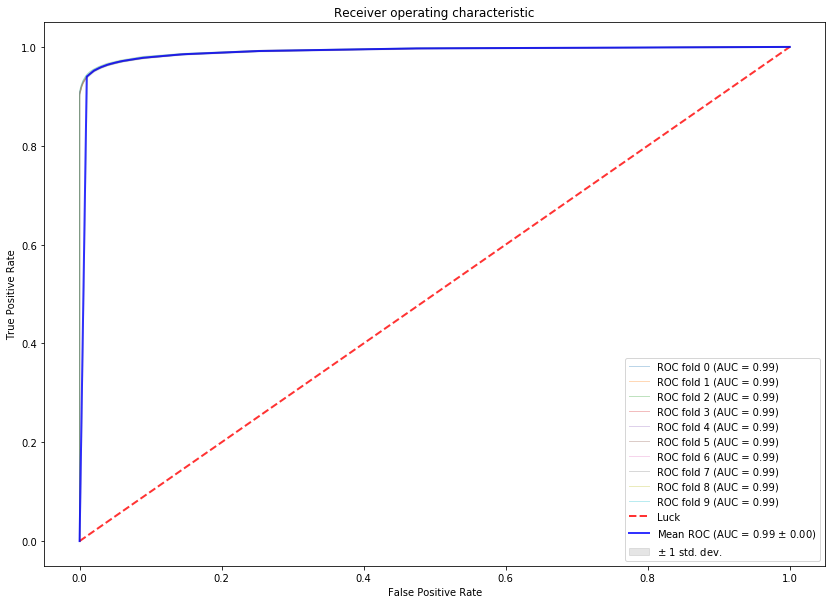

,AUC Train,AUC Test
0,1.0,0.991634
1,1.0,0.991826
2,1.0,0.993129
3,1.0,0.992555
4,1.0,0.992065
5,1.0,0.992091
6,1.0,0.992018
7,1.0,0.991673
8,1.0,0.992071
9,1.0,0.992803


In [234]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    print(f'fold {i} in process')
    print('fitting...')
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    print('computing train roc auc...')
    _, _, auc_score_train = compute_roc_auc(train)
    print('computing test roc auc...')
    fpr, tpr, auc_score = compute_roc_auc(test)
    print('appending socres')
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])


### Analyze random forest results

In [235]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.9875951881690762


array([[314178,     61],
       [  4435,  43766]])

In [236]:
clf.feature_importances_


array([0.0624846 , 0.04060229, 0.05029301, 0.06310145, 0.17272782,
       0.41094833, 0.19984252])

In [237]:
X_test.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp'],
      dtype='object')

In [238]:
import sklearn.feature_selection


In [239]:
sklearn.feature_selection.chi2(X_train, y_train)


(array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
        9.34132218e+09, 5.54222873e+09, 1.01753650e+10]),
 array([0., 0., 0., 0., 0., 0., 0.]))

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [241]:
kbest_model = SelectKBest(chi2, 'all').fit(X_train, y_train)


In [242]:
kbest_model.scores_


array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
       9.34132218e+09, 5.54222873e+09, 1.01753650e+10])

### Logistic Regression with Cross Validation

In [274]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [275]:
y_pred = clf.predict(X_test)

In [276]:
accuracy_score(y_test, y_pred)

0.8670097119523231

In [277]:
clf.coef_

array([[-7.70124039e-18, -1.40602682e-25, -6.80580477e-26,
        -2.49135962e-29, -3.43788189e-25,  1.77432499e-26,
         4.53132585e-24]])

## Step 4: Analyze Features

### size

In [246]:
canonical_df['size'].describe()


count    1.572046e+06
mean     2.125502e+04
std      1.169464e+04
min      5.180000e+02
25%      1.273600e+04
50%      2.236700e+04
75%      2.981100e+04
max      5.355760e+05
Name: size, dtype: float64

In [245]:
uncle_df['size'].describe()


count    81202.000000
mean       539.661782
std          6.076964
min        518.000000
25%        538.000000
50%        541.000000
75%        545.000000
max        553.000000
Name: size, dtype: float64

In [247]:
forked_df['size'].describe()

count     94483.000000
mean      19430.001069
std       12794.332241
min         517.000000
25%        8729.000000
50%       20817.000000
75%       29016.000000
max      426087.000000
Name: size, dtype: float64

In [248]:
broadcast_df['size'].describe()

count    6.446700e+04
mean     1.580268e+05
std      1.274961e+05
min      1.054000e+03
25%      5.890000e+04
50%      1.565490e+05
75%      2.429330e+05
max      4.042178e+06
Name: size, dtype: float64

### miner

We group miners and count their canonical blocks,   
and then, show their performance, which is performance = canonical number / (canonical number + non canonical number)

In [252]:
# dict['miner_addr'] = counter
non_canonical_miner_dict = dict()  
canonical_miner_dict = dict()

# count non canonical blocks for miners
for miner_addr in uncle_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1

for miner_addr in forked_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
for miner_addr in broadcast_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
# count canonical blocks for miners
for miner_addr in canonical_df.miner:
    if miner_addr in canonical_miner_dict:
        canonical_miner_dict[miner_addr] += 1
    else:
        canonical_miner_dict[miner_addr] = 1

List the miners who create most non canonical blocks

In [253]:
sorted(non_canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 36975),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 30266),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 23591),
 ('0x829bd824b016326a401d083b33d092293333a830', 20553),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 14002),
 ('', 11295),
 ('0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c', 9802),
 ('0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8', 9492),
 ('0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5', 7697),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 6672),
 ('0x829BD824B016326A401d083B33D092293333A830', 5764),
 ('0xb2930B35844a230f00E51431aCAe96Fe543a0347', 4142),
 ('0x1b5b5906306c96b842dc03105e3b38636a4eda0b', 2869),
 ('0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01', 2228),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 2041),
 ('0x61c808d82a3ac53231750dadc13c777b59310bd9', 1995),
 ('0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb', 1699),
 ('0x84a0d77c693adabe0ebc48f88b3ffff010577051', 1545),
 ('0x04668Ec2f57cC15c381b461B9fEDaB5D451c8F7F'

List the miners who create most canonical blocks

In [251]:
sorted(canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 417480),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 353943),
 ('0x829bd824b016326a401d083b33d092293333a830', 190661),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 190257),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 88772),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 27046),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 22593),
 ('0x35f61dfb08ada13eba64bf156b80df3d5b3a738d', 20852),
 ('0x04668ec2f57cc15c381b461b9fedab5d451c8f7f', 20750),
 ('0x005e288d713a5fb3d7c9cf1b43810a98688c7223', 19225),
 ('0xd224ca0c819e8e97ba0136b3b95ceff503b79f53', 18427),
 ('0x09ab1303d3ccaf5f018cd511146b07a240c70294', 17333),
 ('0xaa5c4244f05c92781c4f259913319d8ba1acf05e', 13154),
 ('0x52e44f279f4203dcf680395379e5f9990a69f13c', 12214),
 ('0x4c549990a7ef3fea8784406c1eecc98bf4211fa5', 12049),
 ('0x06b8c5883ec71bc3f4b332081519f23834c8706e', 10796),
 ('0x9d6d492bd500da5b33cf95a5d610a73360fcaaa0', 10488),
 ('0x00192fb10df37c9fb26829eb2cc623cd1bf599e

Collect miners appearing in both canonical and non canonical datasets  
Calculate the miners performance

In [261]:
# performance = canonical / (canonical + non canonical)
# we have canonical and non canonical (uncle, forked and broadcast),
# miner_performance_dict = dict()  # dict[miner_addr] = performance
# for miner_addr, c_block_number in canonical_miner_dict.iter:

miner_performance_dict = dict()

for cur_miner, canonical_number in canonical_miner_dict.items():
    if cur_miner in non_canonical_miner_dict:
        miner_performance_dict[cur_miner] = canonical_number / (canonical_number + non_canonical_miner_dict[cur_miner])
#    else:
 #       miner_performance_dict[cur_miner] = 


List miners performance 

In [263]:
sorted(miner_performance_dict.items(), key=lambda kv: kv[1], reverse=True)      


[('0x9541b5a7beb445641990e8cf67ce8ad467ec930b', 0.9964664310954063),
 ('0x09e76074fa4e2d100d14d54c45a5558567d80c28', 0.987012987012987),
 ('0xf616d8d43635098d7a145d8bc5418d95d6a3d8c0', 0.9869791666666666),
 ('0x0f06d283513504c261ff789f33df1d93e9a5225c', 0.9833679833679834),
 ('0x7c6694032b4db11ac485e1cff0f7509d58b41569', 0.9800590841949779),
 ('0x8bf932fb121c3c278d62ad4d36fad2fc03a14bce', 0.9785932721712538),
 ('0xff1b891969773159366ab6310ff63a69ac4acffd', 0.9762675296655879),
 ('0xee2564013e07792478a289c7d2e2791a2d73fe3d', 0.9761904761904762),
 ('0xb3e2d691a9aa6a7895891243c63646326adb2a8e', 0.9714285714285714),
 ('0x2575188aa6fab4d7dd948544039b4231cf20badd', 0.967741935483871),
 ('0xb2d0cba76ed764c068d25bc9b620365fd5bf4a35', 0.9666666666666667),
 ('0x11a73b18557944fbde9f41c0c436069f870bd2eb', 0.9661016949152542),
 ('0xf3a71cc1be5ce833c471e3f25aa391f9cd56e1aa', 0.9615384615384616),
 ('0x1a496ef4a87299c3fa2da155f581242a1d0d40de', 0.9611650485436893),
 ('0x4b38a1f9c1a580fe29f150d738eac85

Set the performance bar  
Collect miners whose performance is higher than the bar

In [264]:
performance_boundary = 0.5
good_miner = dict()

for cur_miner, cur_performance in miner_performance_dict.items():
    if cur_performance >= performance_boundary:
        good_miner[cur_miner] = cur_performance     

List good miners with canoncial number and performance

In [266]:
for miner in canonical_miner_dict:
    if miner in good_miner:
        print(miner, ' ', canonical_miner_dict[miner], ' ', good_miner[miner])

0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c   353943   0.9212251665109354
0x2a5994b501e6a560e727b6c2de5d856396aadd38   22593   0.917147032556629
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5   190257   0.8896833264748794
0x2a65aca4d5fc5b5c859090a6c34d164135398226   27046   0.8021234948692093
0x829bd824b016326a401d083b33d092293333a830   190661   0.9026911094908482
0xea674fdde714fd979de3edf0f56aa9716b898ec8   417480   0.9186388091230154
0x35f61dfb08ada13eba64bf156b80df3d5b3a738d   20852   0.9408473582096286
0x70aec4b9cffa7b55c0711b82dd719049d615e21d   2513   0.8615015426808365
0xb2930b35844a230f00e51431acae96fe543a0347   88772   0.8637593165586627
0x3e8702685ed7826a55acb1c6eb4a6d74638d165c   96   0.9411764705882353
0x52e44f279f4203dcf680395379e5f9990a69f13c   12214   0.9175869581549094
0x09ab1303d3ccaf5f018cd511146b07a240c70294   17333   0.9206458809157062
0xff1b891969773159366ab6310ff63a69ac4acffd   1810   0.9762675296655879
0x06b8c5883ec71bc3f4b332081519f23834c8706e   10796   0.92100324176

For miners not appearing in good miner, we find their canonical blocks numbers are pretty small. So we can ignore them.

In [267]:
for miner in canonical_miner_dict:
    if miner not in good_miner:
        print(canonical_miner_dict[miner])

28
1
38
34
1
1
1
3
17
16
11
1
2
22
7
1
1
1
1
1
1
1
26
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
5
1
1
1
1
1
1
1
1
1
6
1
1
16
11
1
1
1
1
1
1
1
1
1
1
11
5
4
1
1
1
1
1
1
1
1
1
3
9
1
1
6
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
57
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
2
1
3
17
1
1
1
1
1
1
1
1
1
1
25
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
25
1
1
1
1
1
1
1
1
1
1
20
1
11
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
45
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
14
9
59
1
2
37
1
1
1
19
19
23
1
37
22
1
3
1
1
1
3
1
1


### Analyze relationship between factors and the corresponding value 

In [278]:
from scipy import stats

In [279]:
stats.pearsonr(result.timestamp.to_numpy(), result.label.to_numpy())

(-0.30414423503104915, 0.0)

In [287]:
stats.pearsonr(result.gasLimit.to_numpy(), result.label.to_numpy())

(-0.2623883112084949, 0.0)

In [288]:
stats.pearsonr(result.gasUsed.to_numpy(), result.label.to_numpy())

(-0.02557144910533309, 9.173872111352913e-260)

In [291]:
stats.pearsonr(result.miner.to_numpy(), result.label.to_numpy())

(-0.06438982829823495, 0.0)

In [292]:
result.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp', 'label'],
      dtype='object')